<a href="https://colab.research.google.com/github/hmarathe420/Kotak_Mahindra_Bank_Stock_Price_Prediction/blob/main/Kotak_Mahindra_Bank_Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project - Kotak Mahindra Bank Stock Price Prediction**
## **Name - Harshal Marathe**
### **Project Type - Regression**
#### **Role - Data Science Intern at Bharat Intern**

### **Project Summary -**


As a Data Science Intern at Bharat Intern, I have been assigned the exciting task of developing a Stock Price Prediction model for Kotak Mahindra Bank. This project aims to leverage machine learning techniques to analyze historical stock market data and build a predictive model that can forecast future stock prices for Kotak Mahindra. The primary objective of this project is to develop a robust machine learning model that can accurately forecast the future stock prices of Kotak Mahindra Bank based on historical market data.

Key Project Steps:

1. Data Collection: The first step in your project will be to gather historical stock market data for Kotak Mahindra Bank. This dataset will likely include daily or intraday information about the stock's opening price, closing price, high and low prices, trading volume, and other relevant financial indicators.

2. Data Preprocessing: Once you have collected the data, you will perform data preprocessing to clean and prepare it for analysis. This step involves handling missing values, removing duplicates, and dealing with any outliers or noise in the data. Proper data preprocessing is essential for building accurate and reliable predictive models.

3. Exploratory Data Analysis (EDA): After preprocessing the data, you will conduct an Exploratory Data Analysis (EDA) to gain insights into the dataset. Visualization techniques and statistical summaries will be used to identify patterns, trends, and relationships between different variables. EDA will help you understand the data better and guide feature selection and engineering.

4. Feature Engineering: Feature engineering is a crucial step in stock price prediction. You will extract or create relevant features from the existing dataset to provide meaningful input to the machine learning algorithms. Lagged features, technical indicators, and market sentiment features are some examples of potential features that might enhance the model's predictive power.

5. Model Selection: The next step is to choose suitable machine learning algorithms for the prediction task. Commonly used models for time series forecasting include Linear Regression, Support Vector Regression, Random Forest Regression, Gradient Boosting Regression, and Long Short-Term Memory (LSTM) networks. You will explore these models and select the most appropriate one based on their performance during evaluation.

6. Model Training and Evaluation: Once the model is selected, you will train it on the preprocessed data and evaluate its performance using appropriate evaluation metrics such as Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), or R-squared. The model will be tested on a validation set to assess its generalization capability.

7. Hyperparameter Tuning: Fine-tune the hyperparameters of the selected model to optimize its performance. This process involves adjusting the model's parameters to achieve better accuracy and robustness.

8. Prediction: After successfully training and tuning the model, you will deploy it to predict the future stock prices of Kotak Mahindra Bank. The predictions will be interpreted to understand how the model responds to various market conditions.

The successful completion of this project will demonstrate your data science skills, including data preprocessing, exploratory data analysis, feature engineering, machine learning modeling, and predictive analysis. It will also provide valuable insights into the potential performance of stock price prediction models, which can be applied in financial decision-making and investment strategies.

### Import Required Libraries

In [166]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.optimizers import Adam

### Data collection and Understanding

In [167]:
from operator import index
# loading the kotak bank dataset from the yfinance library
df = yf.download('KOTAKBANK.NS,', start = '2019-01-01', end='2022-12-31', progress = False)

In [168]:
# top 5 rows of dataset
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-01,1254.000000,1256.00,1242.250000,1250.449951,1247.377319,1202580
2019-01-02,1247.900024,1248.25,1227.000000,1240.599976,1237.551636,1713677
2019-01-03,1240.000000,1251.00,1227.650024,1235.250000,1232.214722,1825888
2019-01-04,1238.000000,1252.00,1230.000000,1247.949951,1244.883545,1468796
2019-01-07,1250.949951,1254.00,1241.000000,1246.599976,1243.536743,1211456


In [169]:
# last 5 rows of dataset
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-12-26,1821.949951,1826.099976,1794.199951,1813.550049,1812.057983,4746738
2022-12-27,1822.650024,1827.949951,1807.000000,1820.900024,1819.401978,1548286
2022-12-28,1824.400024,1831.400024,1815.250000,1820.099976,1818.602539,1904268
2022-12-29,1814.400024,1820.000000,1801.000000,1818.750000,1817.253662,2154490
2022-12-30,1825.099976,1838.000000,1822.300049,1827.250000,1825.746704,2692688


In [170]:
# Describe the dataset
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,990.000000,990.000000,990.000000,990.000000,990.000000,9.900000e+02
mean,1654.308181,1674.052877,1632.254901,1653.633282,1650.796568,3.728684e+06
std,245.176533,245.843011,245.210868,244.899482,244.922208,4.274852e+06
min,1095.050049,1155.000000,1001.000000,1098.250000,1096.141846,1.976090e+05
25%,1436.750000,1466.050049,1408.250031,1443.237549,1440.467255,2.081424e+06
50%,1722.950012,1734.200012,1697.724976,1717.450012,1714.578796,2.860446e+06
75%,1844.562500,1864.000000,1820.212494,1844.612518,1841.670563,4.257448e+06
max,2200.000000,2253.000000,2176.600098,2210.949951,2207.801758,8.385990e+07


In [171]:
# dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 990 entries, 2019-01-01 to 2022-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       990 non-null    float64
 1   High       990 non-null    float64
 2   Low        990 non-null    float64
 3   Close      990 non-null    float64
 4   Adj Close  990 non-null    float64
 5   Volume     990 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 54.1 KB


In [172]:
# shape of dataset
df.shape

(990, 6)

In [173]:
# counting the duplicate rows of the dataset
df.duplicated().sum()

0

In [174]:
# counting the missing or null values of the dataset
df.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

From the above analysis we get to know that there are 990 rows and 6 column in our dataset and there are no any null values and duplicated rows present in this dataset. from the dataset information we get to know that the volume column has int datatype and rest of the column has float datatype.

### Exploratory Data Analysis and Data Visualization

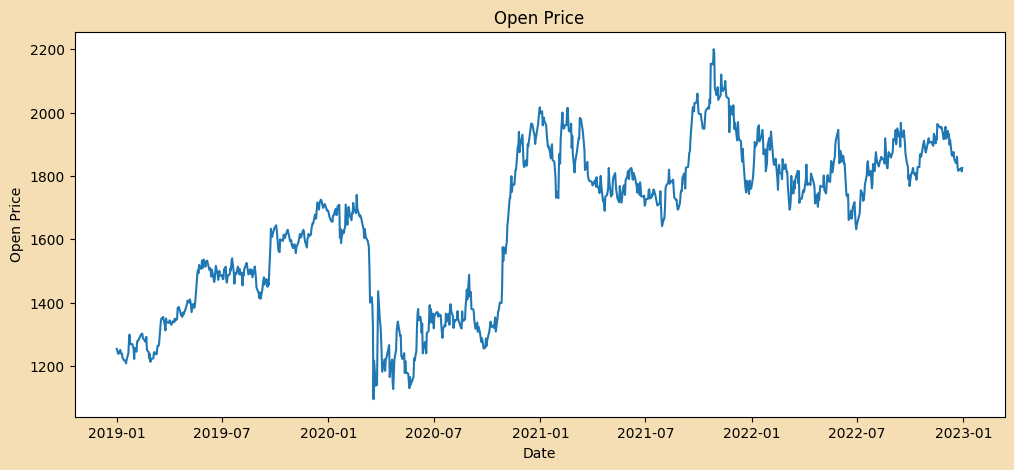

In [175]:
# open price trends over the date
plt.figure(figsize = (12,5), facecolor ='wheat')
sns.lineplot(df, x ='Date', y = 'Open')
plt.xlabel('Date')
plt.ylabel("Open Price")
plt.title("Open Price")
plt.plot()
plt.show()

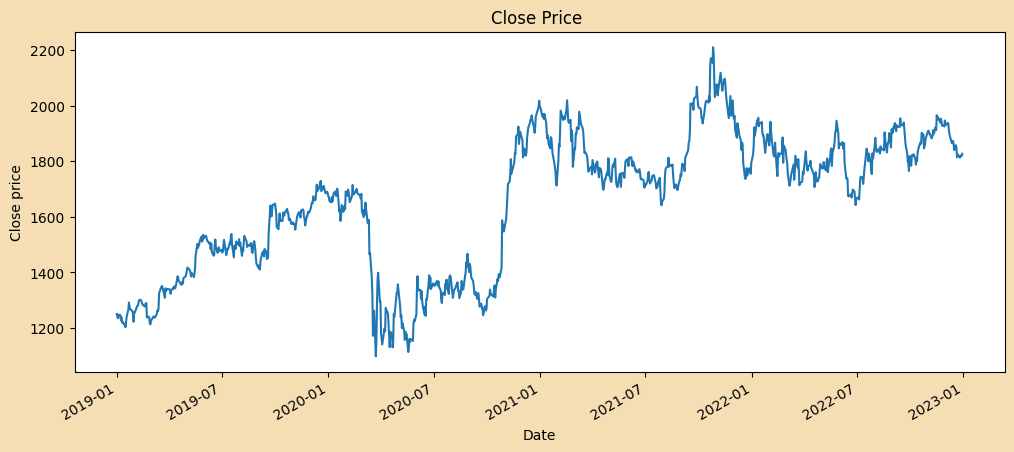

In [176]:
# Close price trends over the date column
plt.figure(facecolor ='wheat')
df['Close'].plot(figsize =(12,5))
plt.title("Close Price ")
plt.xlabel('Date')
plt.ylabel('Close price')
plt.show()

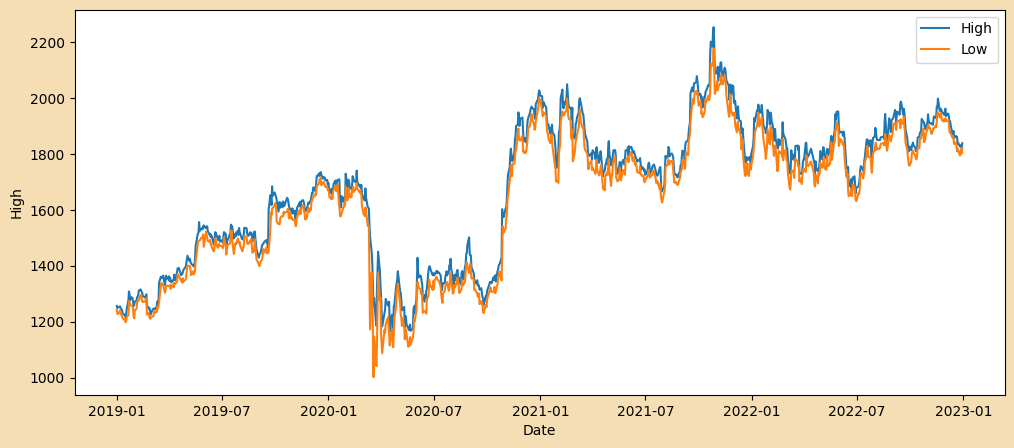

In [177]:
# high and low price trends with date column
plt.figure(figsize = (12,5), facecolor ='wheat')
sns.lineplot(df, x = 'Date', y = 'High', label = 'High')
sns.lineplot(df, x = 'Date', y = 'Low', label = 'Low')
plt.legend()
plt.plot()
plt.show()

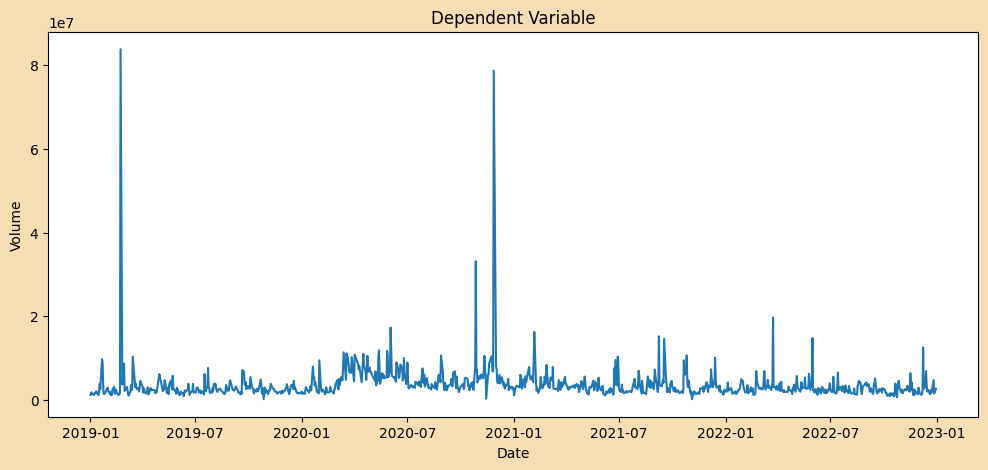

In [178]:
# ploting the dependent variable - volume
plt.figure(figsize = (12,5), facecolor = 'wheat')
sns.lineplot(df, x = 'Date', y = 'Volume')
plt.title('Dependent Variable')
plt.xlabel("Date")
plt.ylabel("Volume")
plt.plot()
plt.show()

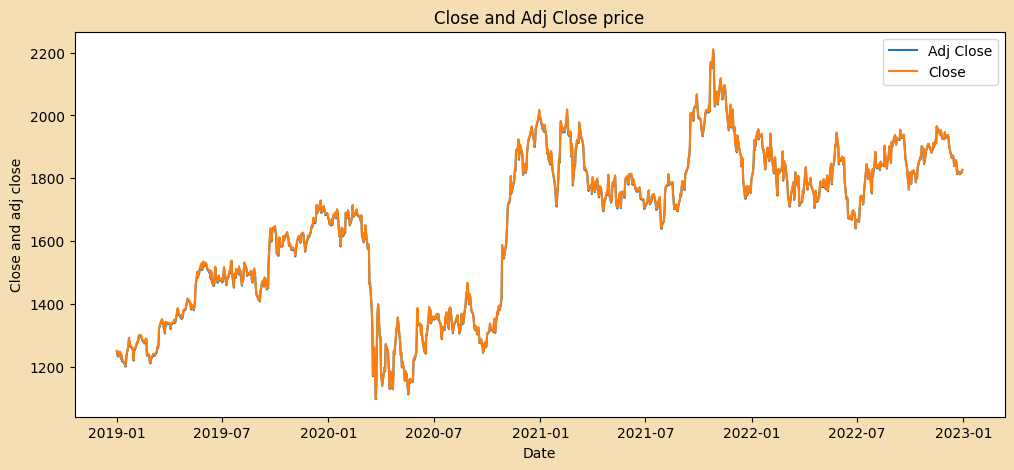

In [179]:
# line plot for ajd close and close column
plt.figure(figsize=(12,5), facecolor = 'wheat')
sns.lineplot(df, x = 'Date', y = 'Adj Close', label = 'Adj Close')
sns.lineplot(df,  x = 'Date', y = 'Close', label = 'Close')
plt.title("Close and Adj Close price")
plt.xlabel('Date')
plt.ylabel("Close and adj close")
plt.legend()
plt.plot()
plt.show()

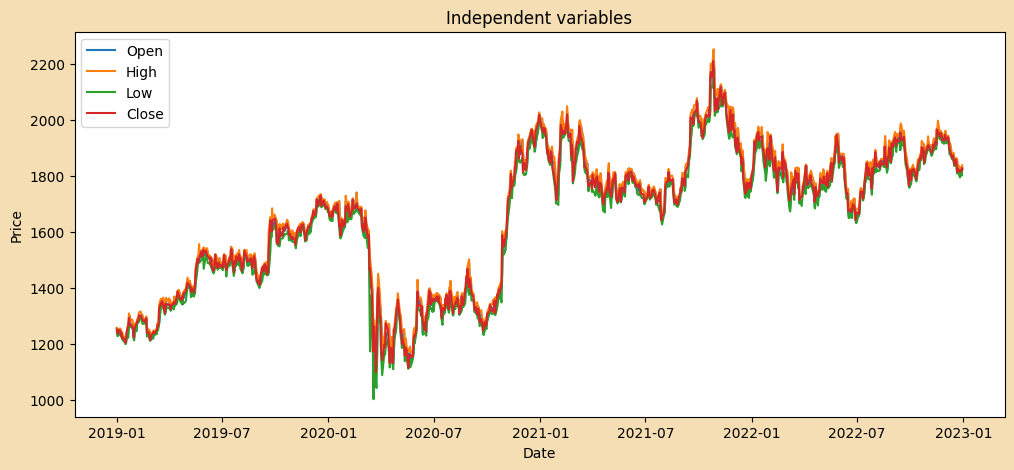

In [180]:
# ploting the lineplot for all independent variables
plt.figure(figsize =(12,5), facecolor = 'wheat')
sns.lineplot(df,x = 'Date', y = 'Open', label = 'Open')
sns.lineplot(df,x = 'Date', y = 'High', label = 'High')
sns.lineplot(df,x = 'Date', y = 'Low', label = 'Low')
sns.lineplot(df,x = 'Date', y = 'Close', label = 'Close')
plt.xlabel("Date")
plt.ylabel('Price')
plt.title('Independent variables')
plt.legend()
plt.plot()
plt.show()

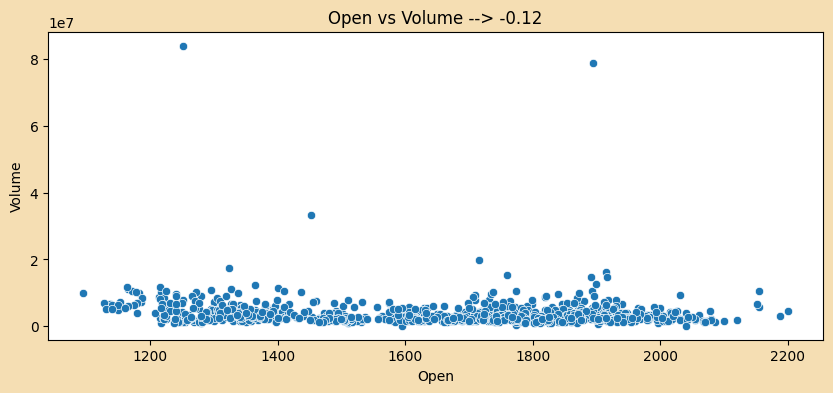

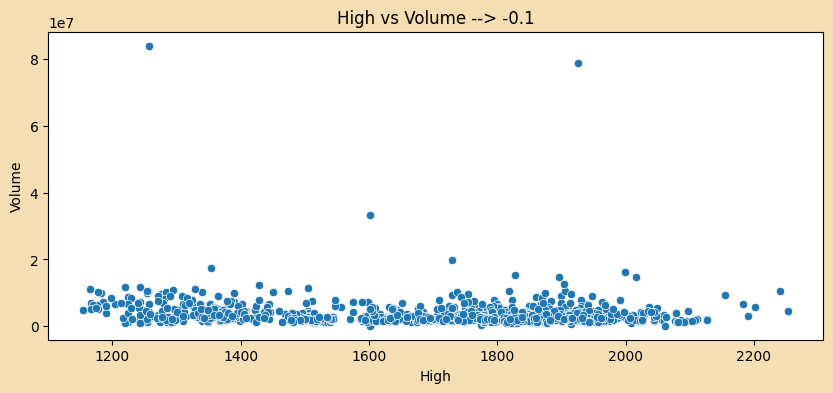

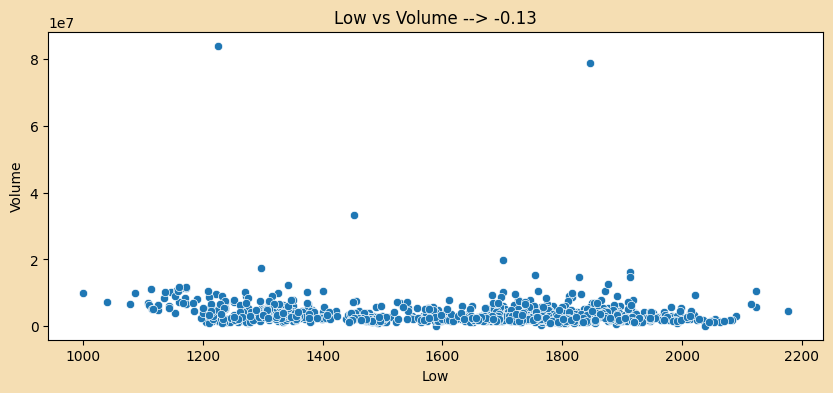

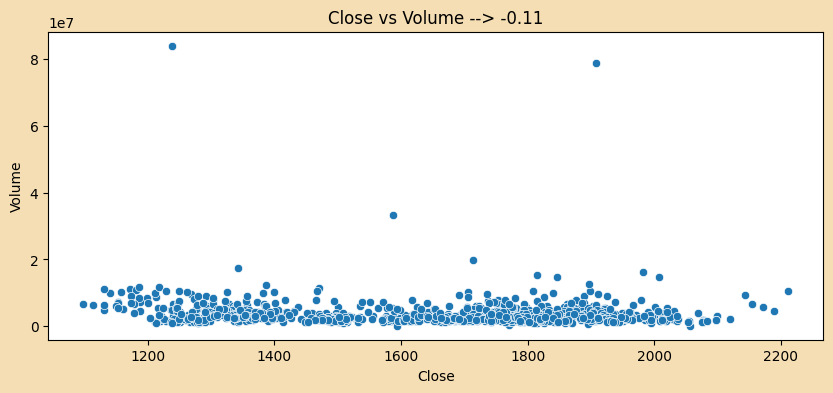

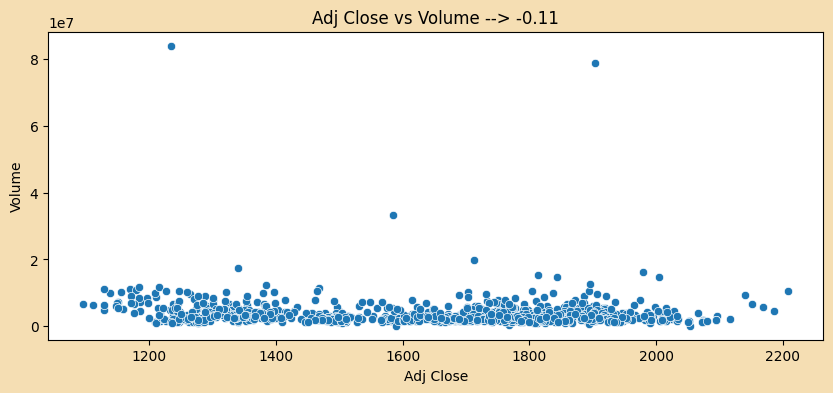

In [181]:
# corelation between dependent variables and independent variable
var_list = [col for col in df.columns if col != 'Volume']

for name in var_list:
  plt.figure(figsize=(10,4), facecolor ='wheat')
  sns.scatterplot(df, x = name, y = 'Volume')
  corelation_score = round(df[name].corr(df['Volume']),2)
  plt.title(f"{name} vs Volume --> {corelation_score}")
  plt.xlabel(name)
  plt.ylabel("Volume")
plt.plot()
plt.show()

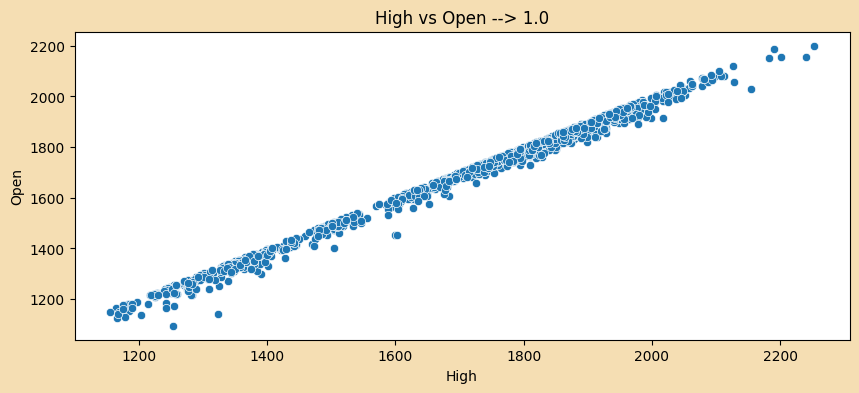

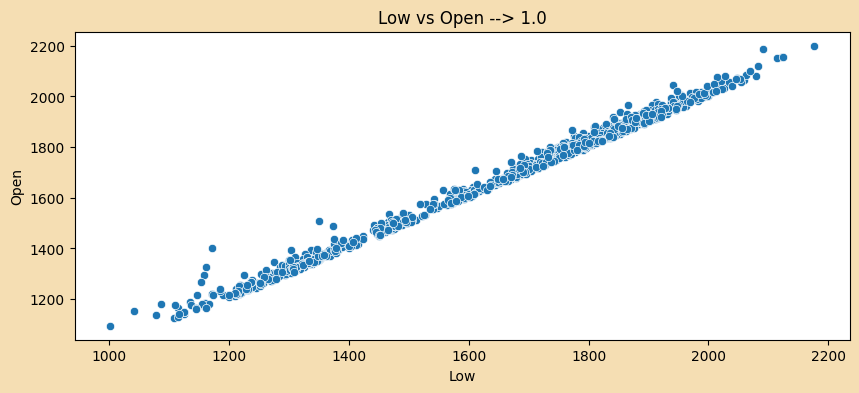

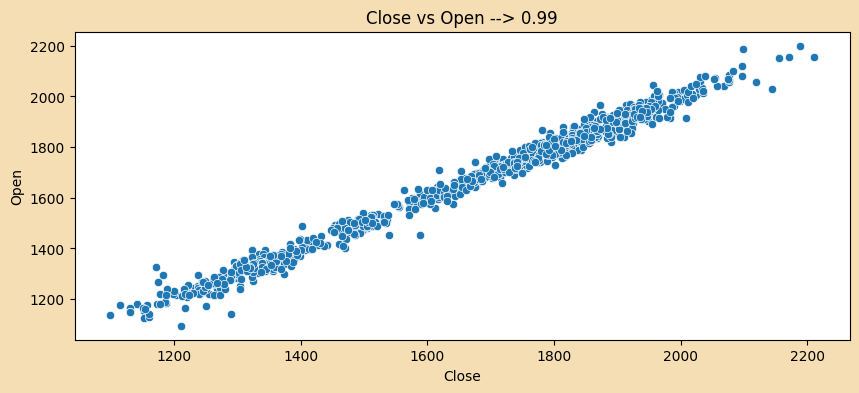

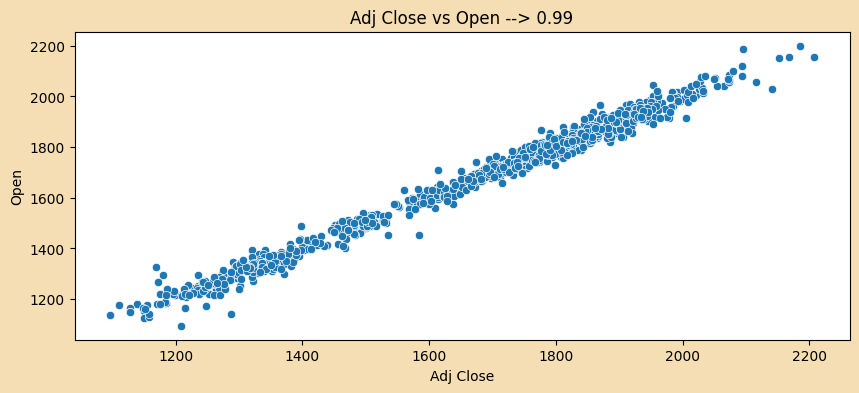

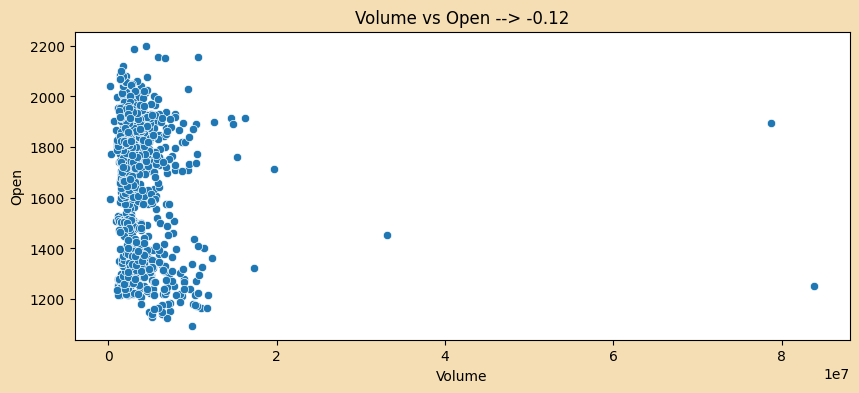

In [182]:
# corelation of all the variables with Open variabel
var_list_ = [col for col in df.columns if col != 'Open']

for name in var_list_:
  plt.figure(figsize=(10,4), facecolor ='wheat')
  sns.scatterplot(df, x = name, y = 'Open')
  corelation_score = round(df[name].corr(df['Open']),2)
  plt.title(f"{name} vs Open --> {corelation_score}")
  plt.xlabel(name)
  plt.ylabel("Open")
plt.plot()
plt.show()

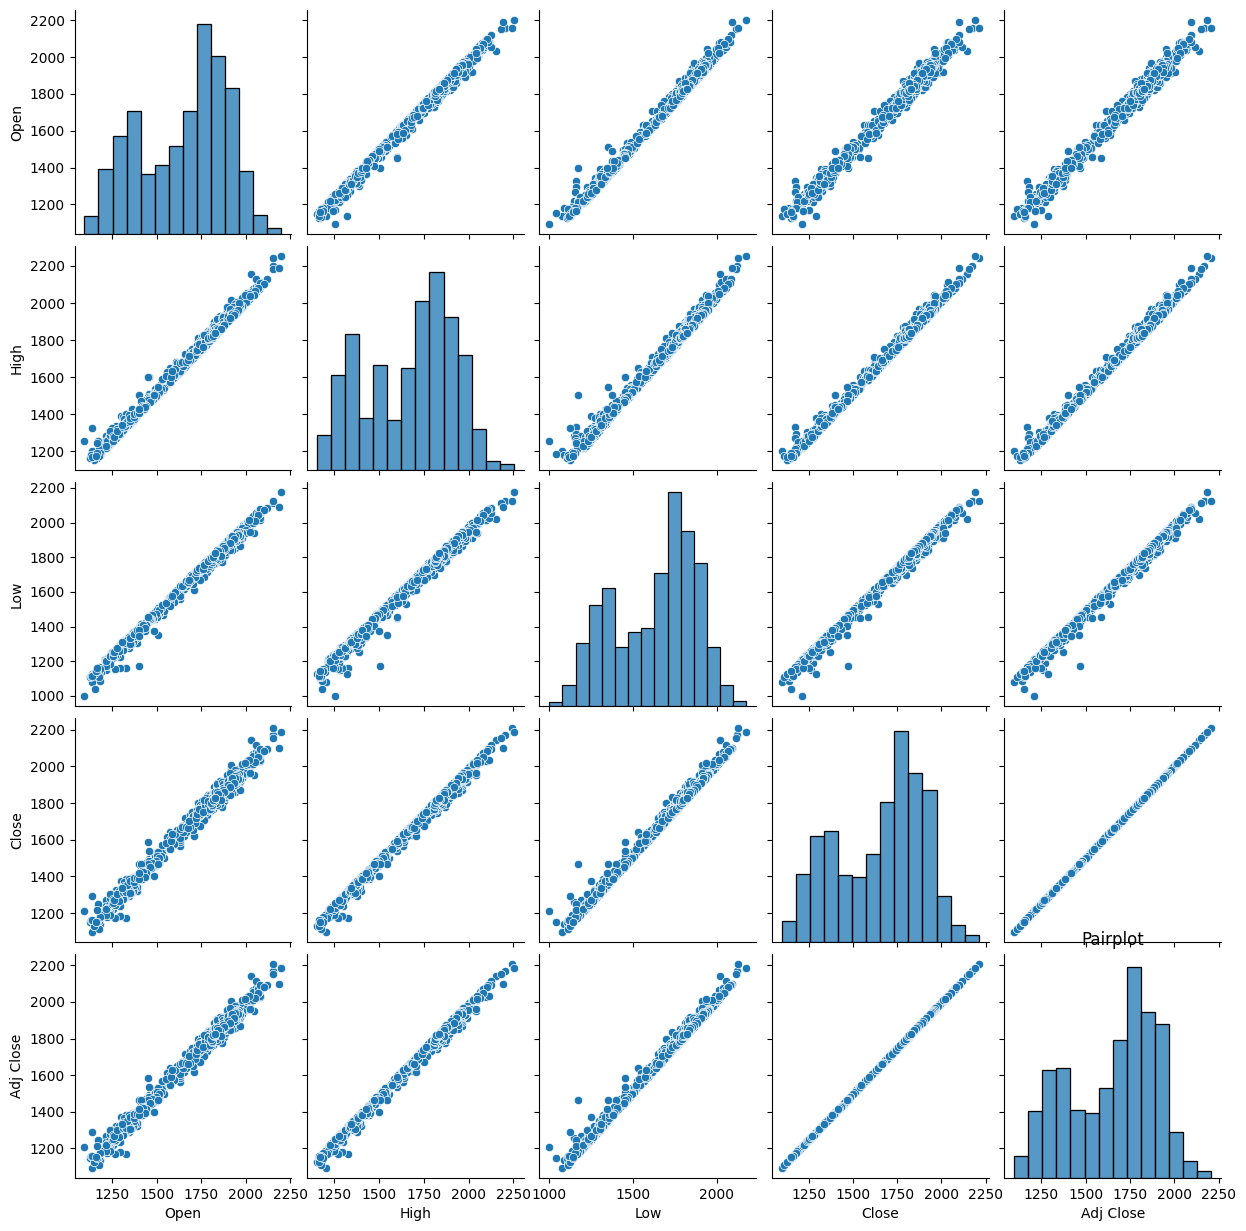

In [183]:
# ploting the pairplot
sns.pairplot(df[var_list])
plt.title("Pairplot")
plt.plot()
plt.show()

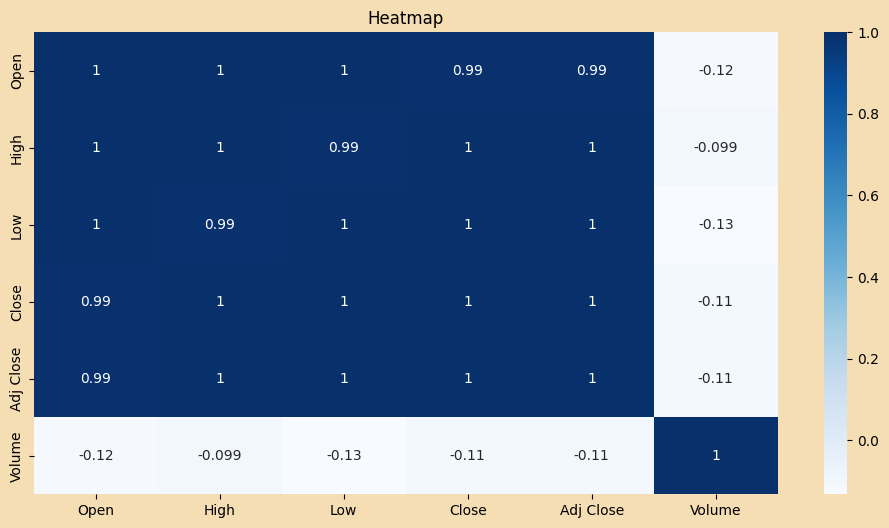

In [184]:
# ploting the heatmap for corelation of each variable with each other
plt.figure(figsize =(12,6), facecolor = 'wheat')
sns.heatmap(df.corr(), annot = True, cmap ='Blues')
plt.title('Heatmap')
plt.show()

### Machine Learning

In [185]:
# Defining the print_evaluate function for printing the metrics of ml model
def print_evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')

In [186]:
# getting independent and dependent variable column names
indep_var = [col for col in df.columns if col != 'Volume']
dep_var = 'Volume'

In [187]:
# data storing in x and y variable for spliting the data
x = df[indep_var].values
y = df[dep_var].values

In [188]:
# Data Spliting
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

### **Implementation of LSTM**

In [189]:
# Normalize the 'Close' price between 0 and 1
scaler = MinMaxScaler()
df['Close'] = scaler.fit_transform(df[['Close']])

In [190]:
# Define the number of past days to use for prediction
look_back = 60

# Convert the data into sequences suitable for LSTM
def create_sequences(data, look_back):
    X, y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:i + look_back])
        y.append(data[i + look_back])
    return np.array(X), np.array(y)

X, y = create_sequences(df['Close'].values, look_back)

# Split the data into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [191]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

Epoch 1/100
24/24 [==============================] - 2s 19ms/step - loss: 0.0533
Epoch 2/100
24/24 [==============================] - 0s 19ms/step - loss: 0.0058
Epoch 3/100
24/24 [==============================] - 0s 19ms/step - loss: 0.0041
Epoch 4/100
24/24 [==============================] - 0s 19ms/step - loss: 0.0035
Epoch 5/100
24/24 [==============================] - 0s 19ms/step - loss: 0.0033
Epoch 6/100
24/24 [==============================] - 0s 19ms/step - loss: 0.0032
Epoch 7/100
24/24 [==============================] - 0s 18ms/step - loss: 0.0032
Epoch 8/100
24/24 [==============================] - 0s 19ms/step - loss: 0.0030
Epoch 9/100
24/24 [==============================] - 0s 20ms/step - loss: 0.0029
Epoch 10/100
24/24 [==============================] - 0s 19ms/step - loss: 0.0029
Epoch 11/100
24/24 [==============================] - 0s 19ms/step - loss: 0.0027
Epoch 12/100
24/24 [==============================] - 0s 19ms/step - loss: 0.0027
Epoch 13/100
24/24 [=====

In [192]:
# Make predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

6/6 [==============================] - 0s 5ms/step


In [193]:
# Model performance on Training Dataset
print_evaluate(y_train,train_predictions)

MAE: 0.022083482429884435
MSE: 0.0009407746648119311
RMSE: 0.03067205022185395
R2 Square 0.9798372374106337
__________________________________


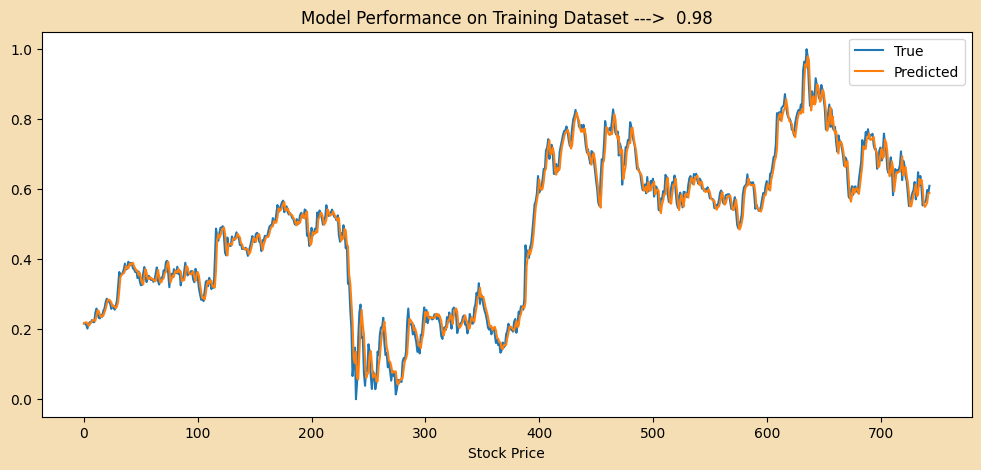

In [194]:
# ploting model performance on training dataset
score = r2_score(y_train,train_predictions)
plt.figure(figsize = (12,5), facecolor = 'wheat')
plt.plot(y_train , label = 'True')
plt.plot(train_predictions, label = 'Predicted')
plt.title(f"Model Performance on Training Dataset --->  {round(score,2)}")
plt.xlabel("Stock Price")
plt.legend()
plt.show()

In [195]:
# Model Performance on Testing Dataset
print_evaluate(y_test,test_predictions)

MAE: 0.018465291106536025
MSE: 0.0005725597467719099
RMSE: 0.023928220718889857
R2 Square 0.8790458097990795
__________________________________


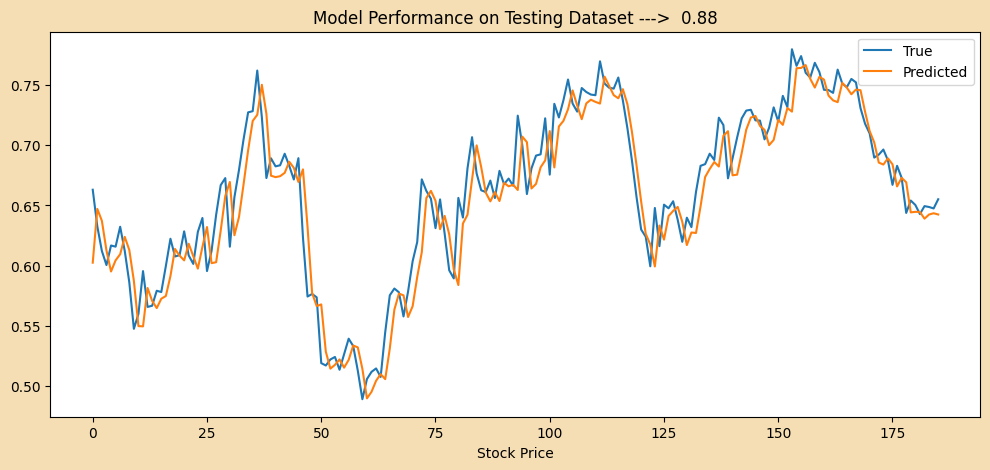

In [196]:
# Ploting Model Performance on Testing Dataset
score = r2_score(y_test,test_predictions)
plt.figure(figsize = (12,5), facecolor = 'wheat')
plt.plot(y_test , label = 'True')
plt.plot(test_predictions, label = 'Predicted')
plt.title(f"Model Performance on Testing Dataset --->  {round(score,2)}")
plt.xlabel("Stock Price")
plt.legend()
plt.show()

### **Conclusion :**

In this project, titled "Kotak Mahindra Bank Stock Price Prediction," we aimed to forecast the stock prices of Kotak Mahindra, a prominent financial institution, using the LSTM (Long Short-Term Memory) model. The project encompassed two significant components: Exploratory Data Analysis (EDA) and LSTM model implementation.

From the above evaluation matrix and ploted graph we can conclude that this model perform well on this dataset. This model given 98% accuracy on training dataset and 88 % on testing dataset.